In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
cam = cv2.VideoCapture(0)
cv2.namedWindow("test")
l=[]
while True:
    ret, frame = cam.read()
    l.append(frame)
    if not ret:
        print("err in capturing")
        break
    cv2.imshow("test", frame)
    k = cv2.waitKey(1)
    if k == 27:
        print("Escape hit")
        break
    elif k%256 == 32:
        print(error(l[-1],l[-2]))

cam.release()
cv2.destroyAllWindows()

Escape hit


In [5]:
def error(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

In [ ]:
import cv2              #opencv library for image processing
import numpy as np

import time
import matplotlib.pyplot as plt  # library for plotting data

import pyttsx3           #to add voice when motion is detected
import threading

%matplotlib notebook     
plt.rcParams['animation.html'] = 'jshtml'

fig = plt.figure()      # creating figure for plotting 
ax = fig.add_subplot(111) 
fig.show()

def thread_voice_alert(engine):  # funtion which will be excecuted when motion is detected
    engine.say("Motion Detected")
    engine.runAndWait()

cap = cv2.VideoCapture(1) # getting live stream from camera

frame_width = int( cap.get(cv2.CAP_PROP_FRAME_WIDTH)) #getting frame width

frame_height =int( cap.get( cv2.CAP_PROP_FRAME_HEIGHT)) #getting frame height


fourcc = cv2.VideoWriter_fourcc('X','V','I','D')

out = cv2.VideoWriter("output.avi", fourcc, 5.0, (1280,720)) #displaying video 

ret, frame1 = cap.read() # getting frame 1
ret, frame2 = cap.read() # getting frame 2 consecutive frames
i=0                      #varible used for plotting
yi=[]                    #list to storedata for plotting
xi=[]                    #list to storedata for plotting

engine = pyttsx3.init()  #initializing voice engine
voices = engine.getProperty('voices') 
engine.setProperty('voice', voices[1].id) #setting voice 
engine.setProperty('rate', 150)


while True: #running loop to take continous frames and form a video
    
    diff = cv2.absdiff(frame1, frame2) #calulating difference between continous frames
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY) #converting result image into gray scale
    blur = cv2.GaussianBlur(gray, (5,5), 0) #smooting the image
    _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY) #appling threshold to the resulted image 
    dilated = cv2.dilate(thresh, None, iterations=3)
    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #forming contours 
    
    param=[] #list to store parameters
    
    xi.append(i) #updating x axis elements
    
    ar={}
    
    for contour in contours: #iterating over all contours detected
        (x, y, w, h) = cv2.boundingRect(contour) 
        ar[cv2.contourArea(contour)]=contour 
        param.append(cv2.contourArea(contour)) #storing all contours in a list
    
    if len(param)>0: # if any contours detected
        (x, y, w, h) = cv2.boundingRect(ar[max(param)])
        
        if max(param)>1100: #keeping a thershold value for the area of the motion detected if area exceeds this threshold then 
                            #a valid motion is detected

            cv2.rectangle(frame1, (x, y), (x+w, y+h), (0, 255, 0), 2) #creating a rectangular frame 
            yi.append(max(param)) #updating y parameter




            cv2.putText(frame1, "Status: {}".format('Movement'), (10, 20), cv2.FONT_HERSHEY_SIMPLEX,
                        1, (0, 0, 255), 3) #displaying text on the frame when motion detected
            t = threading.Thread(target=thread_voice_alert, args=(engine,)) #alerting voice when motion is detected
            t.start()
        else:
            yi.append(max(param))
    else:
        yi.append(50) #if no contours were found then updating y parameter with a value
    i=i+1
    
    fig.canvas.draw() #drawing the canvas

    ax.set_xlim(left=max(0, i-50), right=i+50) #setting axses limits
    ax.set_ylim(0,50000)
    
    ax.plot(xi,yi,"b") #updating the plot
    
    image = cv2.resize(frame1, (1280,720))
    
    out.write(image) 
    
    cv2.imshow("feed", frame1) #displaying video(live feed)
    cv2.imshow("absdiff",diff)
    cv2.imshow('diff',gray)
    cv2.imshow("dilate",dilated)
    frame1 = frame2 #considering current frame as frame1 
    ret, frame2 = cap.read() #new frame as frame 2

    if cv2.waitKey(40) == 27:
        break
    
plt.close()
cv2.destroyAllWindows()
cap.release()
out.release()

In [50]:
def afre(v):
    return (344/(334+v))*3562

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

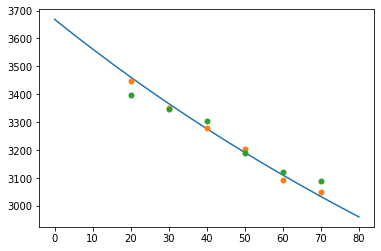

In [57]:
dv=np.linspace(0,80,100)
l=[]
for i in dv:
    l.append(afre(i))
plt.plot(dv,l)
v=[20,30,40,50,60,70]
f1=[3446,3352,3278,3203,3093,3048]
f2=[3397,3346,3302,3190,3120,3089]
plt.plot(v,f1,'.',markersize=10)
plt.plot(v,f2,'.',markersize=10)

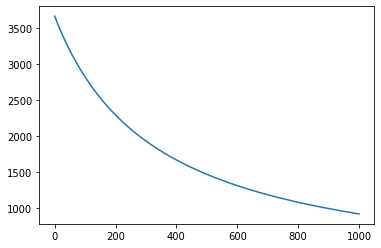

In [58]:
dv=np.linspace(0,1000,2000)
l=[]
for i in dv:
    l.append(afre(i))
plt.plot(dv,l)

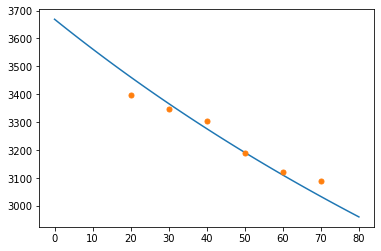

In [59]:
dv=np.linspace(0,80,100)
l=[]
for i in dv:
    l.append(afre(i))
favg=[]
for i in range(len(v)):
    favg.append((f1[i]+f2[i])/2)
plt.plot(dv,l)
plt.plot(v,f2,'.',markersize=10)

In [65]:
mse=0
for i in range(len(v)):
    mse=mse+(afre(v[i])-favg[i])**2
print(mse/len(v))
    

563.5142092898654
